#Boosting Techniques | Assignment

Q-1 : What is Boosting in Machine Learning? Explain how it improves weak
learners.


A-1 : Boosting is an ensemble learning technique that combines multiple weak learners sequentially, where each new learner focuses on correcting the errors of the previous ones, resulting in a strong predictive model. It improves weak learners by assigning higher weights to misclassified samples, reducing bias and increasing accuracy

Q-2 : What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?


A-2 : Difference in Training Approach:

AdaBoost: Trains models sequentially by adjusting the weights of training samples — misclassified samples get higher weights so the next learner focuses more on them.

Gradient Boosting: Trains models sequentially by fitting each new model to the residual errors (gradients) of the previous model, using gradient descent to minimize a loss function.

Q-3 : How does regularization help in XGBoost?

A-3 : In XGBoost, regularization helps by penalizing overly complex trees, which prevents overfitting and improves generalization.

L1 regularization (α) → pushes some leaf weights to zero, creating a simpler, sparser model.

L2 regularization (λ) → smooths leaf weights to avoid extreme values.

This keeps the model accurate on training data while staying reliable on unseen data.

Q-4 : Why is CatBoost considered efficient for handling categorical data?

A-4 : CatBoost is efficient for categorical data because it converts categorical features into numerical values internally using target statistics (like mean target value) with an ordered boosting technique that prevents target leakage.

It handles high-cardinality categories well without one-hot encoding, reducing preprocessing time and preserving information.


Q-5 : What are some real-world applications where boosting techniques are
preferred over bagging methods?

A-5 : Boosting is often preferred over bagging when high predictive accuracy is required and the dataset is relatively clean (less noisy).
Some real-world applications include:

Credit scoring & fraud detection – Detecting subtle patterns in financial transactions.

Customer churn prediction – Identifying customers likely to leave a service.

Search engine ranking – Ranking web pages (e.g., Gradient Boosting in Google’s ranking algorithms).

Medical diagnosis – Predicting diseases from patient records with high precision.

Online ad click-through rate prediction – Boosting algorithms like XGBoost for ad targeting.

Q-6 : ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.
Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9649


Q-7 : Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
(Include your Python code and output in the code box below.)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.7756


Q-8 : Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
(Include your Python code and output in the code box below.)

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning rate tuning
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# GridSearchCV for tuning
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.2}
Test Accuracy: 0.9561


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:16:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Q-9 : Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.)

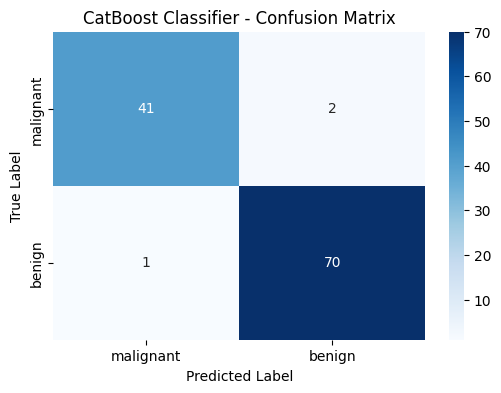

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CatBoost Classifier - Confusion Matrix")
plt.show()


In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


Q-10 : You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
(Include your Python code and output in the code box below.)

1. Data Preprocessing
Handle Missing Values:

Numeric → fill with median (robust to outliers).

Categorical → fill with mode.

Some boosting algorithms (CatBoost, XGBoost) can directly handle missing values.

Encode Categorical Features:

CatBoost → no manual encoding needed.

XGBoost/AdaBoost → use One-Hot or Target Encoding.

Feature Scaling: Not mandatory for tree-based boosting methods.

Class Imbalance Handling:

Use scale_pos_weight in XGBoost or class weights in CatBoost.

Alternatively, use oversampling (SMOTE) or undersampling.

2. Choice of Algorithm
CatBoost is my top choice because:

Handles categorical features natively.

Handles missing values automatically.

Often performs better with minimal preprocessing.

3. Hyperparameter Tuning Strategy
Use GridSearchCV or RandomizedSearchCV for parameters:

learning_rate

depth

l2_leaf_reg

iterations

For imbalanced data, tune class_weights (CatBoost) or scale_pos_weight (XGBoost).

4. Evaluation Metrics
Since it’s an imbalanced classification problem:

Primary: AUC-ROC (measures ranking ability).

Secondary: Precision, Recall, F1-score (important for detecting defaults).

Avoid accuracy as the main metric because it can be misleading in imbalanced datasets.

5. Business Benefit
Accurate risk assessment → fewer defaults.

Targeted loan approvals → increased profitability.

Better customer segmentation → tailored interest rates.



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from catboost import CatBoostClassifier

# ---- Generate synthetic dataset ----
np.random.seed(42)
n_samples = 5000

# Numeric features
age = np.random.randint(18, 70, size=n_samples)
income = np.random.randint(20000, 200000, size=n_samples)
transactions = np.random.randint(0, 500, size=n_samples)

# Categorical features
gender = np.random.choice(['Male', 'Female'], size=n_samples)
region = np.random.choice(['North', 'South', 'East', 'West'], size=n_samples)

# Target (imbalanced)
loan_default = np.random.choice([0, 1], size=n_samples, p=[0.88, 0.12])

# Create DataFrame
df = pd.DataFrame({
    "age": age,
    "income": income,
    "transactions": transactions,
    "gender": gender,
    "region": region,
    "loan_default": loan_default
})

# ---- Preprocessing ----
X = df.drop("loan_default", axis=1)
y = df["loan_default"]
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# ---- Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Model Initialization ----
model = CatBoostClassifier(
    verbose=0,
    random_state=42,
    eval_metric='AUC',
    class_weights=[1, len(y) / sum(y)]  # Handle imbalance
)

# ---- Hyperparameter Tuning ----
param_dist = {
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5, 7],
    "iterations": [200, 500]
}

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train, cat_features=cat_features)

# ---- Best Model Evaluation ----
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", search.best_params_)
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 6}
ROC-AUC Score: 0.5037560760053027
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       876
           1       0.13      0.34      0.19       124

    accuracy                           0.64      1000
   macro avg       0.50      0.51      0.48      1000
weighted avg       0.79      0.64      0.69      1000

